<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing

In [4]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [5]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [6]:
df = pd.read_csv('iris.data')

In [7]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Task 3: Visualize the Data
---

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


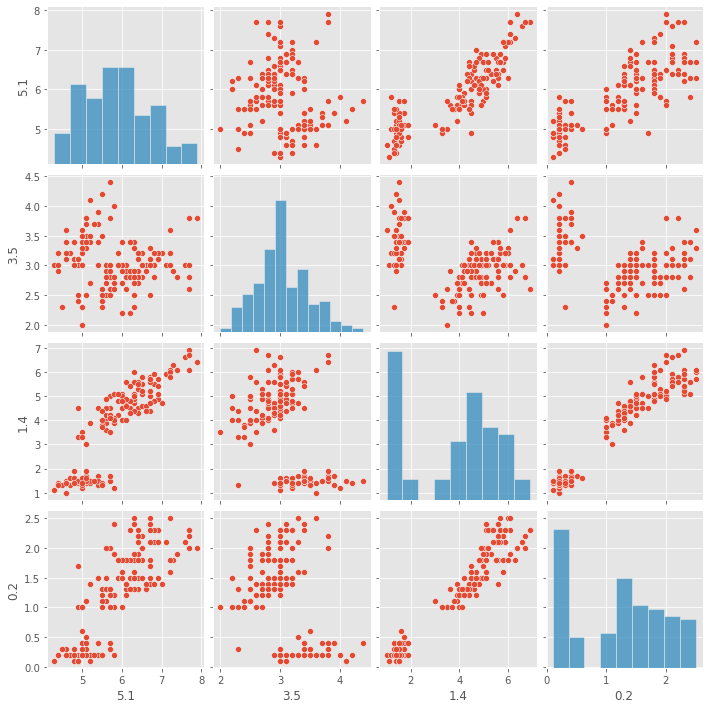

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.shape

(149, 5)

### Task 4: Standardize the Data
---

In [11]:
X_data = df['5.1']
 
# standardization of dependent variables
preprocessing.scale(X_data)

array([-1.1483555 , -1.3905423 , -1.51163569, -1.02726211, -0.54288852,
       -1.51163569, -1.02726211, -1.75382249, -1.1483555 , -0.54288852,
       -1.2694489 , -1.2694489 , -1.87491588, -0.05851493, -0.17960833,
       -0.54288852, -0.90616871, -0.17960833, -0.90616871, -0.54288852,
       -0.90616871, -1.51163569, -0.90616871, -1.2694489 , -1.02726211,
       -1.02726211, -0.78507531, -0.78507531, -1.3905423 , -1.2694489 ,
       -0.54288852, -0.78507531, -0.42179512, -1.1483555 , -1.02726211,
       -0.42179512, -1.1483555 , -1.75382249, -0.90616871, -1.02726211,
       -1.63272909, -1.75382249, -1.02726211, -0.90616871, -1.2694489 ,
       -0.90616871, -1.51163569, -0.66398191, -1.02726211,  1.39460583,
        0.66804545,  1.27351244, -0.42179512,  0.78913885, -0.17960833,
        0.54695205, -1.1483555 ,  0.91023225, -0.78507531, -1.02726211,
        0.06257847,  0.18367186,  0.30476526, -0.30070172,  1.03132564,
       -0.30070172, -0.05851493,  0.42585866, -0.30070172,  0.06

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris.data)

# don't forget to mean-center the data before SVD
X = iris.data - np.mean(iris.data, axis=0)
U, S, Vt = np.linalg.svd(X)

In [23]:
Cov_pca = pca.get_covariance()

print('eigenvalues from PCA:\n{}\n'.format(np.linalg.eigvals(Cov_pca * X.shape[0])))

print('squared singular values from SVD:\n{}'.format(np.square(S)))

eigenvalues from PCA:
[634.23625591  36.40061219  11.73142501   3.57526395]

squared singular values from SVD:
[630.0080142   36.15794144  11.65321551   3.55142885]


### Task 6: Singular Value Decomposition (SVD)
---

In [24]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
U_iris, S_iris, Vt_iris = np.linalg.svd(df_iris)

In [25]:
np.linalg.svd(df_iris)

(array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
         -0.09573864, -0.08085465],
        [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
         -0.03153954,  0.01309526],
        [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
          0.19531473,  0.13569909],
        ...,
        [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
         -0.02194514, -0.00894446],
        [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
          0.94178018, -0.02971961],
        [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
         -0.03021088,  0.9736599 ]]),
 array([95.95991387, 17.76103366,  3.46093093,  1.88482631]),
 array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
        [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
        [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
        [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]]))

### Task 7: Picking Principal Components Using the Explained Variance
---

In [26]:
num_sv_iris = np.arange(1, S_iris.size+1)

cum_var_explained_iris = [np.sum(np.square(S_iris[0:n])) / np.sum(np.square(S_iris)) for n in num_sv_iris]

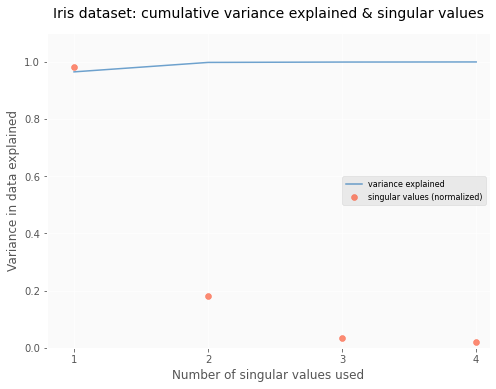

In [27]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_iris,
         cum_var_explained_iris,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv_iris,
            sklearn.preprocessing.normalize(S_iris.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_iris)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Iris dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [28]:
print('Iris dataset has {} rows and {} columns\n'.format(*df_iris.shape))

print('Here are the first 5 rows of the data:\n\n{}\n'.format(df_iris.head(5)))

print('Some simple statistics on the Iris dataset:\n\n{}\n'.format(df_iris.describe()))

Iris dataset has 150 rows and 4 columns

Here are the first 5 rows of the data:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Some simple statistics on the Iris dataset:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000   